In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [301]:
## Read the data file

In [3]:
df=pd.read_csv("wine.csv")
df

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1       1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2       1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3       1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4       1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0             0.28             2.29   5.64  1.04      3.92     1065  
1             0.26             1.28   4.38  1.05      3.40     1050  
2             0.30             2.81   5.68  1.03      3.17     1185  
3             0.24             2.18   7.80  0.86      3.45     1480  
4             0.39             1.82   4.32  1.04      2.93      735  
..             ...              ...    ...   ...       ...      ...  
173           0.52             1.06   7.70  0.64      1.74      740  
174           0.43             1.41   7.30  0.70      1.56      750  
175           0.43             1.35  10.20  0.59      1.56      835  
176           0.53             1.46   9.30  0.60      1.62      840  
177           0.56             1.35   9.20  0.61      1.60      560  

[178 rows x 14 columns]

## TASK 1

In [303]:
## Performing EDA

In [5]:
df.duplicated().any()

False

In [7]:
df.isnull().any()

Type               False
Alcohol            False
Malic              False
Ash                False
Alcalinity         False
Magnesium          False
Phenols            False
Flavanoids         False
Nonflavanoids      False
Proanthocyanins    False
Color              False
Hue                False
Dilution           False
Proline            False
dtype: bool

In [9]:
df.isna().any()

Type               False
Alcohol            False
Malic              False
Ash                False
Alcalinity         False
Magnesium          False
Phenols            False
Flavanoids         False
Nonflavanoids      False
Proanthocyanins    False
Color              False
Hue                False
Dilution           False
Proline            False
dtype: bool

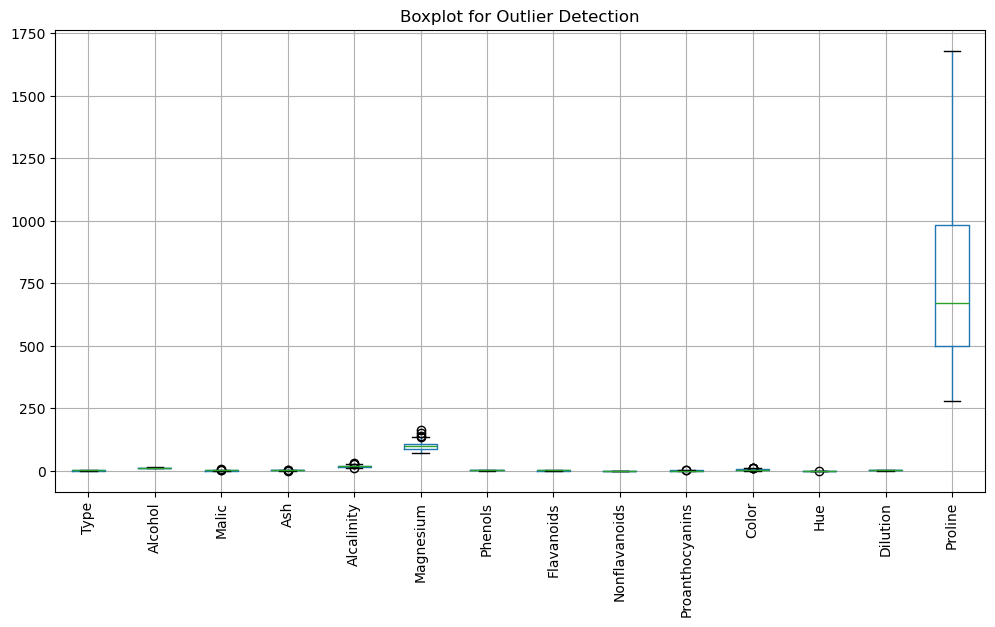

In [15]:
plt.figure(figsize=(12, 6))
df.boxplot(rot=90)
plt.title("Boxplot for Outlier Detection")
plt.show()

In [21]:
Q1 = df.select_dtypes(include=[np.number]).quantile(0.25)  
Q3 = df.select_dtypes(include=[np.number]).quantile(0.75)
IQR = Q3 - Q1
outliers = ((df.select_dtypes(include=[np.number]) < (Q1 - 1.5 * IQR)) | 
            (df.select_dtypes(include=[np.number]) > (Q3 + 1.5 * IQR)))

print("Number of outliers in each column:\n", outliers.sum())

Number of outliers in each column:
 Type               0
Alcohol            0
Malic              3
Ash                3
Alcalinity         4
Magnesium          4
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    2
Color              4
Hue                1
Dilution           0
Proline            0
dtype: int64


In [23]:
df = df.drop(index=outliers.any(axis=1)[outliers.any(axis=1)].index)
df.reset_index(inplace=True)
df

index  Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  \
0        0     1    14.23   1.71  2.43        15.6        127     2.80   
1        1     1    13.20   1.78  2.14        11.2        100     2.65   
2        2     1    13.16   2.36  2.67        18.6        101     2.80   
3        3     1    14.37   1.95  2.50        16.8        113     3.85   
4        4     1    13.24   2.59  2.87        21.0        118     2.80   
..     ...   ...      ...    ...   ...         ...        ...      ...   
156    172     3    14.16   2.51  2.48        20.0         91     1.68   
157    174     3    13.40   3.91  2.48        23.0        102     1.80   
158    175     3    13.27   4.28  2.26        20.0        120     1.59   
159    176     3    13.17   2.59  2.37        20.0        120     1.65   
160    177     3    14.13   4.10  2.74        24.5         96     2.05   

     Flavanoids  Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  \
0          3.06           0.28             2.29   5.64  1.04      3.92   
1          2.76           0.26             1.28   4.38  1.05      3.40   
2          3.24           0.30             2.81   5.68  1.03      3.17   
3          3.49           0.24             2.18   7.80  0.86      3.45   
4          2.69           0.39             1.82   4.32  1.04      2.93   
..          ...            ...              ...    ...   ...       ...   
156        0.70           0.44             1.24   9.70  0.62      1.71   
157        0.75           0.43             1.41   7.30  0.70      1.56   
158        0.69           0.43             1.35  10.20  0.59      1.56   
159        0.68           0.53             1.46   9.30  0.60      1.62   
160        0.76           0.56             1.35   9.20  0.61      1.60   

     Proline  
0       1065  
1       1050  
2       1185  
3       1480  
4        735  
..       ...  
156      660  
157      750  
158      835  
159      840  
160      560  

[161 rows x 15 columns]

In [25]:
df.drop(columns="index",inplace=True)
df

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1       1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2       1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3       1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4       1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
156     3    14.16   2.51  2.48        20.0         91     1.68        0.70   
157     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
158     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
159     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
160     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0             0.28             2.29   5.64  1.04      3.92     1065  
1             0.26             1.28   4.38  1.05      3.40     1050  
2             0.30             2.81   5.68  1.03      3.17     1185  
3             0.24             2.18   7.80  0.86      3.45     1480  
4             0.39             1.82   4.32  1.04      2.93      735  
..             ...              ...    ...   ...       ...      ...  
156           0.44             1.24   9.70  0.62      1.71      660  
157           0.43             1.41   7.30  0.70      1.56      750  
158           0.43             1.35  10.20  0.59      1.56      835  
159           0.53             1.46   9.30  0.60      1.62      840  
160           0.56             1.35   9.20  0.61      1.60      560  

[161 rows x 14 columns]

In [307]:
## Visualization

<Axes: xlabel='Type', ylabel='Density'>

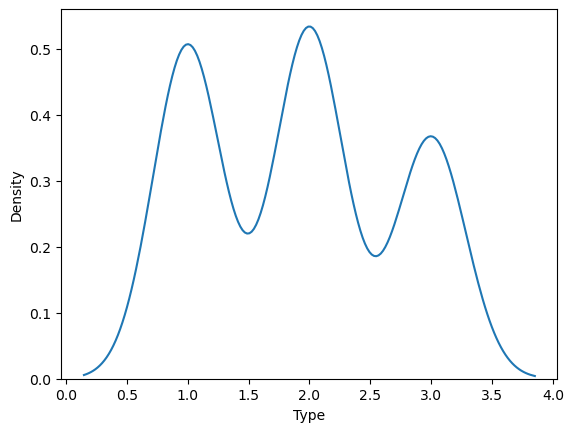

In [31]:
sns.kdeplot(data=df,x="Type")

<Axes: ylabel='Type'>

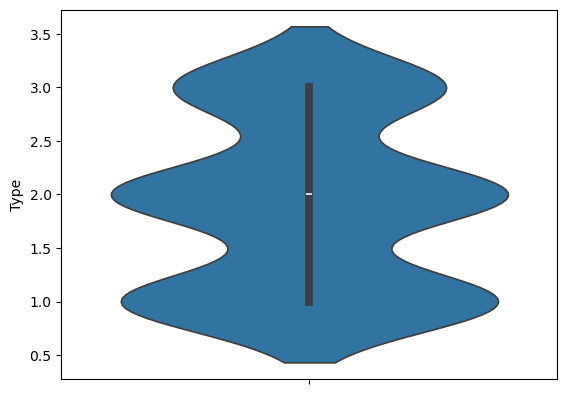

In [33]:
sns.violinplot(data=df,y="Type")

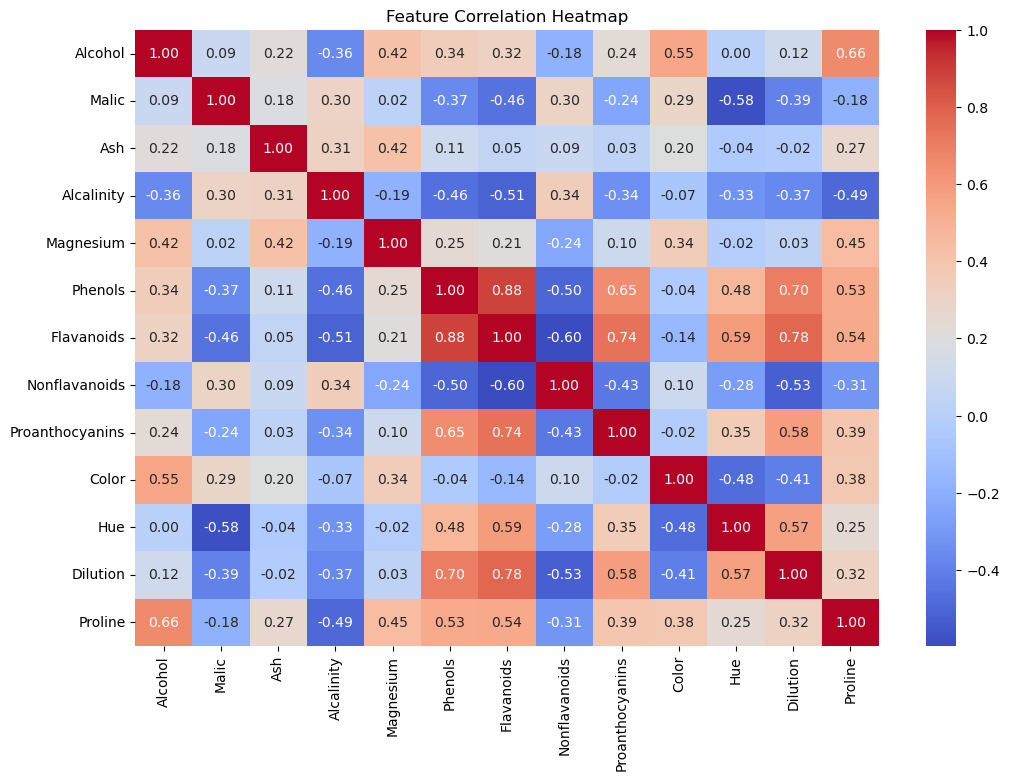

In [39]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.iloc[:,1:].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

## TASK 3

In [309]:
## Standardizing the data for clustering and pca

In [132]:
std=StandardScaler()

In [138]:
df=pd.DataFrame(std.fit_transform(df.iloc[:,1:]),columns=feature.columns)
df

Alcohol     Malic       Ash  Alcalinity  Magnesium   Phenols  \
0    1.495711 -0.571130  0.277425   -1.208619   2.309259  0.808420   
1    0.200698 -0.504145 -0.928625   -2.672685   0.118914  0.570475   
2    0.150407  0.050878  1.275535   -0.210392   0.200038  0.808420   
3    1.671732 -0.341465  0.568540   -0.809329   1.173525  2.474030   
4    0.250990  0.270973  2.107293    0.588189   1.579144  0.808420   
..        ...       ...       ...         ...        ...       ...   
156  1.407700  0.194418  0.485365    0.255447  -0.611200 -0.968231   
157  0.452157  1.534128  0.485365    1.253674   0.281162 -0.777876   
158  0.288709  1.888194 -0.429570    0.255447   1.741392 -1.110998   
159  0.162980  0.270973  0.027897    0.255447   1.741392 -1.015820   
160  1.369982  1.715946  1.566650    1.752787  -0.205581 -0.381302   

     Flavanoids  Nonflavanoids  Proanthocyanins     Color       Hue  Dilution  \
0      1.034224      -0.643463         1.415284  0.296494  0.372149  1.826678   
1      0.728906      -0.808165        -0.511374 -0.300438  0.418153  1.091015   
2      1.217414      -0.478761         2.407227  0.315445  0.326144  0.765626   
3      1.471845      -0.972867         1.205450  1.319806 -0.455928  1.161752   
4      0.657665       0.262398         0.518720 -0.328863  0.372149  0.426090   
..          ...            ...              ...       ...       ...       ...   
156   -1.367607       0.674153        -0.587678  2.219942 -1.560030 -1.299887   
157   -1.316721       0.591802        -0.263389  1.082929 -1.191996 -1.512097   
158   -1.377785       0.591802        -0.377843  2.456820 -1.698043 -1.512097   
159   -1.387962       1.415312        -0.168009  2.030440 -1.652039 -1.427213   
160   -1.306544       1.662365        -0.377843  1.983064 -1.606034 -1.455507   

      Proline  
0    0.947436  
1    0.900976  
2    1.319115  
3    2.232826  
4   -0.074682  
..        ...  
156 -0.306982  
157 -0.028222  
158  0.235051  
159  0.250537  
160 -0.616714  

[161 rows x 13 columns]

In [311]:
## Performing clustering

In [140]:
wcss=[]
n_clusters=range(1,11)
for i in n_clusters:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)
    print(i,kmeans.inertia_)

1 2208.9999999999995
2 1513.5963949093907
3 1079.6561882739647
4 1027.1497256110674
5 943.1996501679237
6 908.6169038209073
7 853.2891286198505
8 813.0911158419743
9 821.8951729662999
10 759.7839969178796


Text(0, 0.5, 'Wcss')

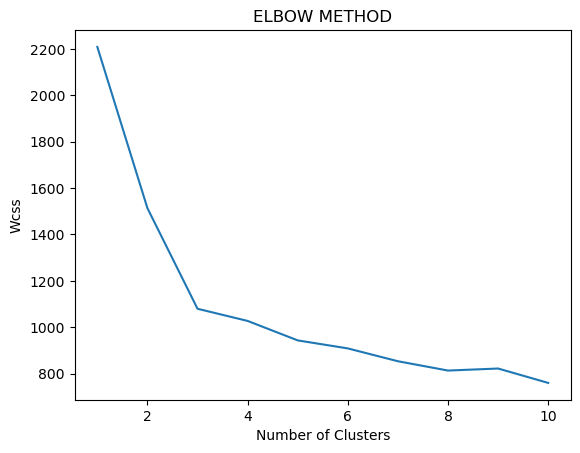

In [142]:
plt.plot(n_clusters,wcss)
plt.title("ELBOW METHOD")
plt.xlabel("Number of Clusters")
plt.ylabel("Wcss")

In [144]:
kmeans=KMeans(n_clusters=3)

In [146]:
kmeans.fit(features)

KMeans(n_clusters=3)

In [148]:
df["Label"]=kmeans.labels_
df

Alcohol     Malic       Ash  Alcalinity  Magnesium   Phenols  \
0    1.495711 -0.571130  0.277425   -1.208619   2.309259  0.808420   
1    0.200698 -0.504145 -0.928625   -2.672685   0.118914  0.570475   
2    0.150407  0.050878  1.275535   -0.210392   0.200038  0.808420   
3    1.671732 -0.341465  0.568540   -0.809329   1.173525  2.474030   
4    0.250990  0.270973  2.107293    0.588189   1.579144  0.808420   
..        ...       ...       ...         ...        ...       ...   
156  1.407700  0.194418  0.485365    0.255447  -0.611200 -0.968231   
157  0.452157  1.534128  0.485365    1.253674   0.281162 -0.777876   
158  0.288709  1.888194 -0.429570    0.255447   1.741392 -1.110998   
159  0.162980  0.270973  0.027897    0.255447   1.741392 -1.015820   
160  1.369982  1.715946  1.566650    1.752787  -0.205581 -0.381302   

     Flavanoids  Nonflavanoids  Proanthocyanins     Color       Hue  Dilution  \
0      1.034224      -0.643463         1.415284  0.296494  0.372149  1.826678   
1      0.728906      -0.808165        -0.511374 -0.300438  0.418153  1.091015   
2      1.217414      -0.478761         2.407227  0.315445  0.326144  0.765626   
3      1.471845      -0.972867         1.205450  1.319806 -0.455928  1.161752   
4      0.657665       0.262398         0.518720 -0.328863  0.372149  0.426090   
..          ...            ...              ...       ...       ...       ...   
156   -1.367607       0.674153        -0.587678  2.219942 -1.560030 -1.299887   
157   -1.316721       0.591802        -0.263389  1.082929 -1.191996 -1.512097   
158   -1.377785       0.591802        -0.377843  2.456820 -1.698043 -1.512097   
159   -1.387962       1.415312        -0.168009  2.030440 -1.652039 -1.427213   
160   -1.306544       1.662365        -0.377843  1.983064 -1.606034 -1.455507   

      Proline  Label  
0    0.947436      0  
1    0.900976      0  
2    1.319115      0  
3    2.232826      0  
4   -0.074682      0  
..        ...    ...  
156 -0.306982      2  
157 -0.028222      2  
158  0.235051      2  
159  0.250537      2  
160 -0.616714      2  

[161 rows x 14 columns]

In [150]:
silhouette_kmeans = silhouette_score(df, kmeans.labels_)
silhouette_kmeans

0.3154944664029833

In [313]:
## Cluster visualization

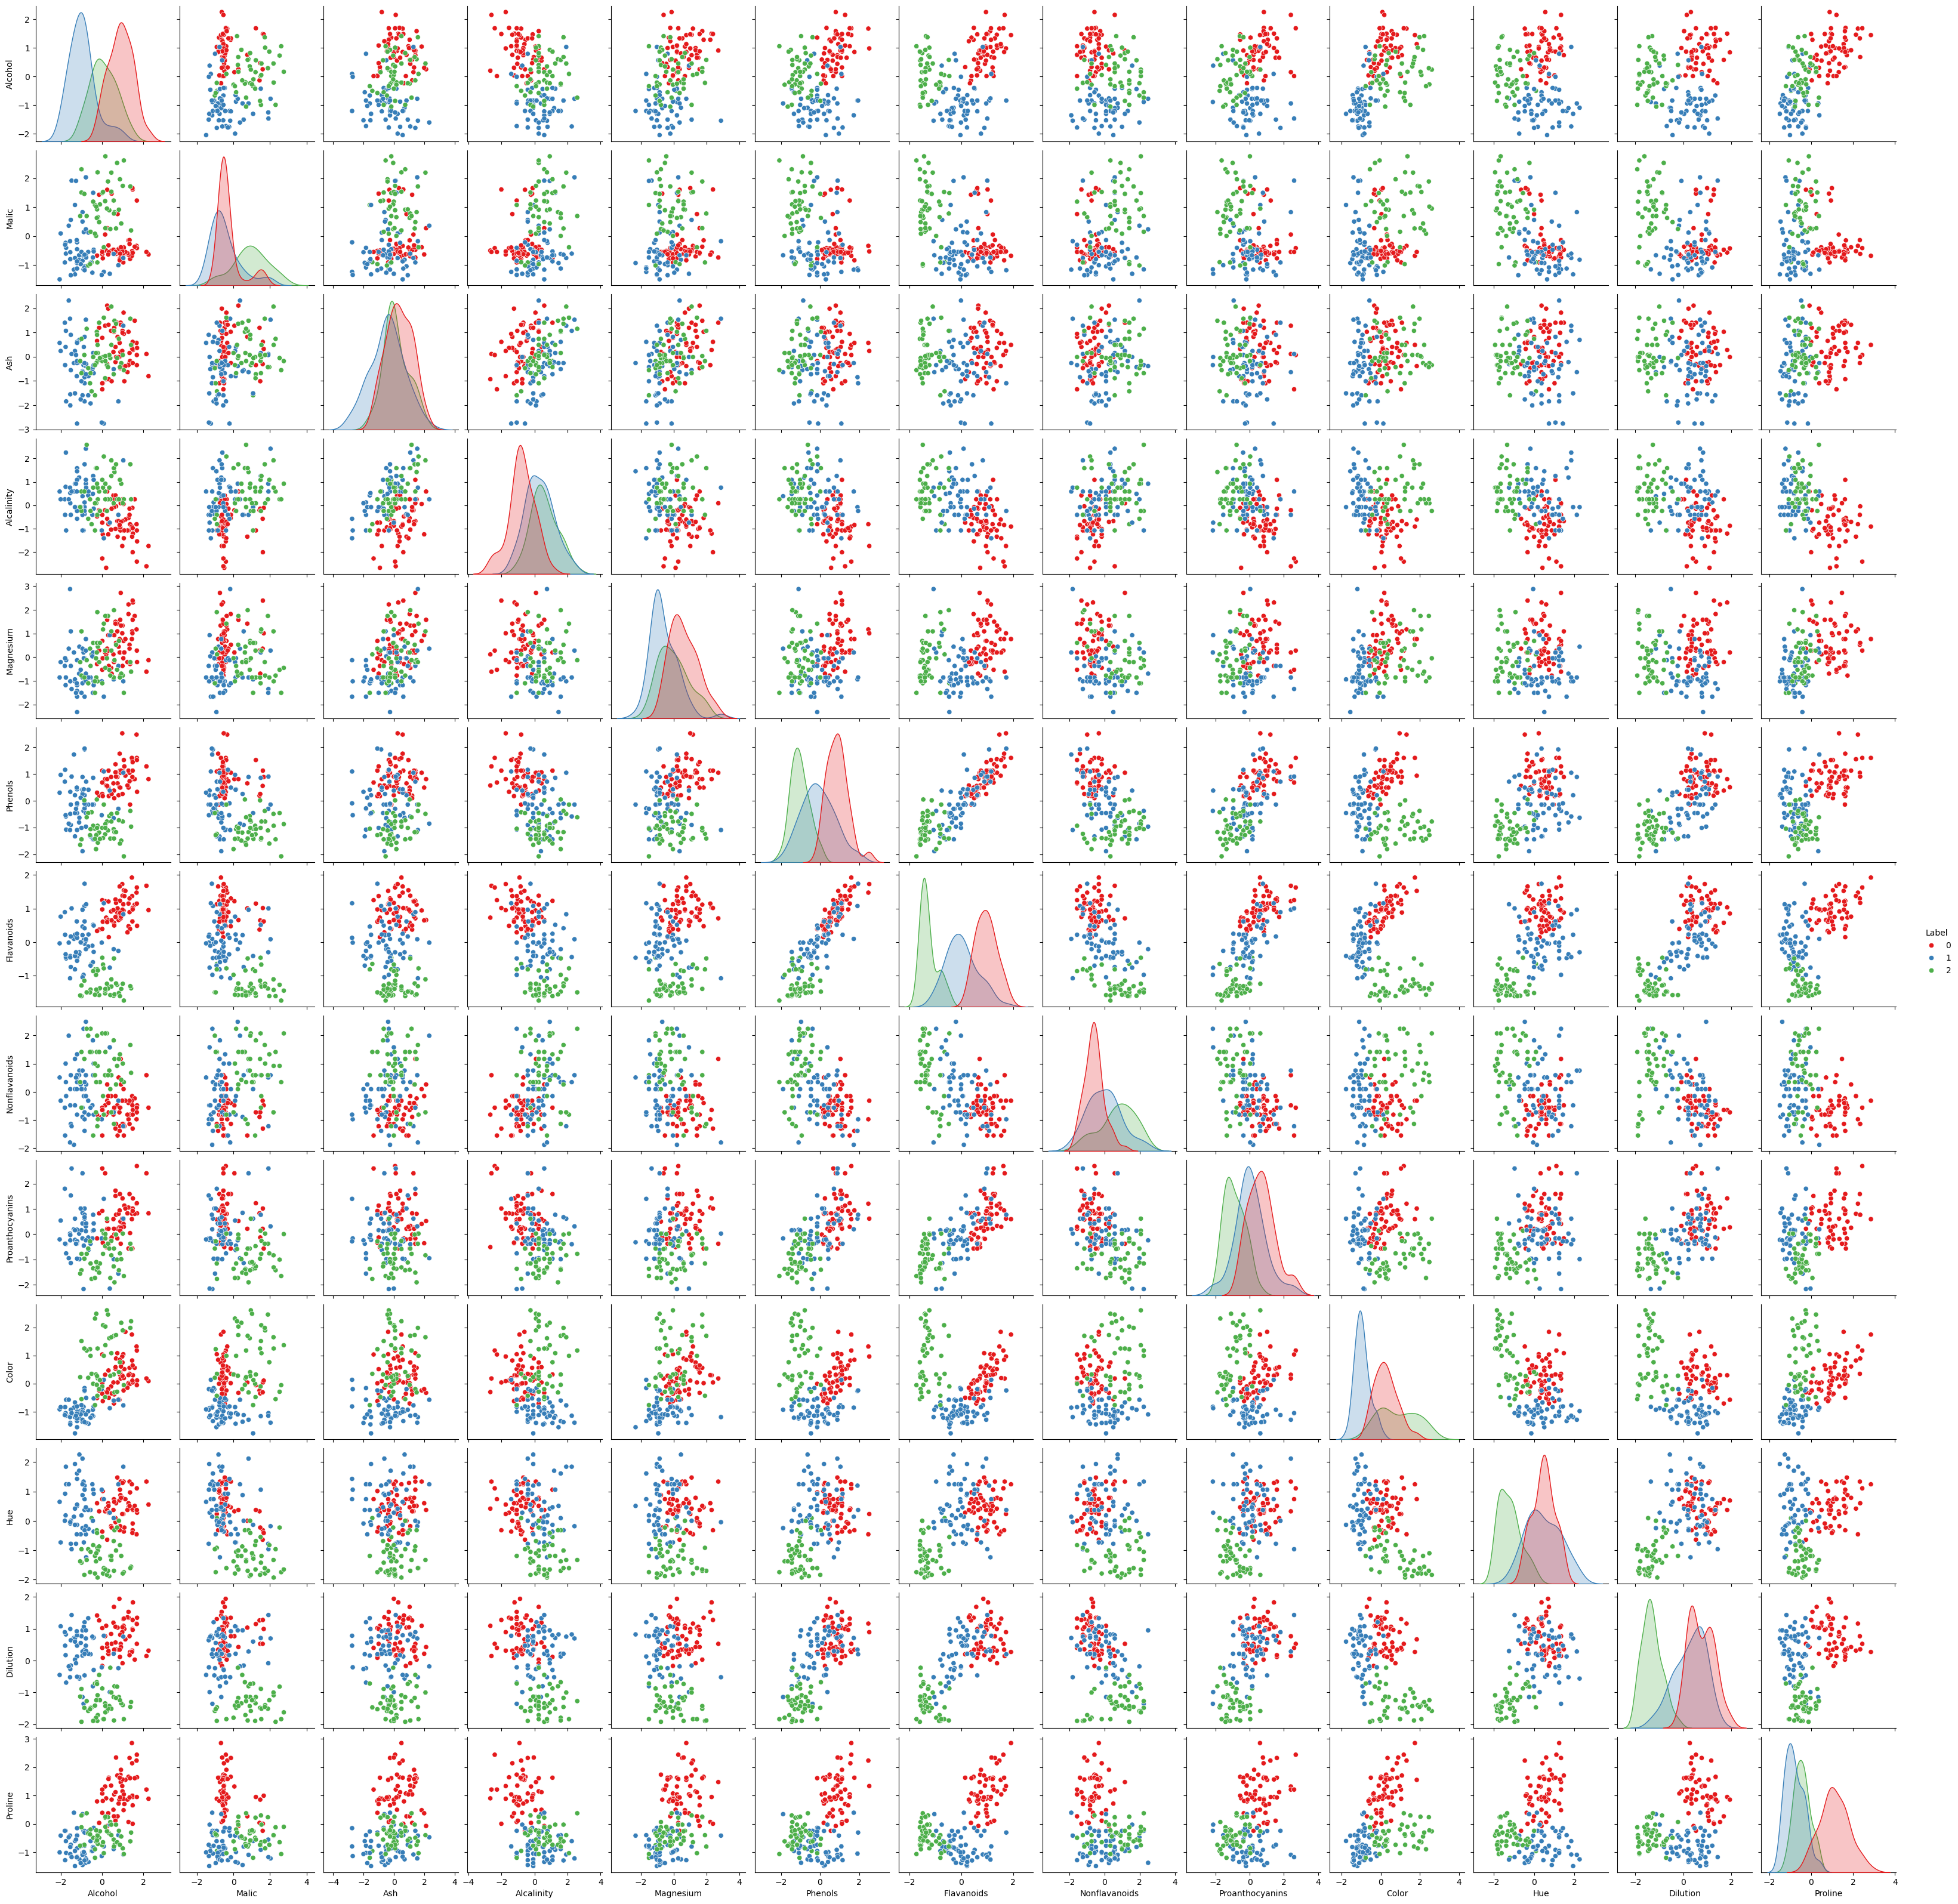

In [152]:
sns.pairplot(df, hue='Label', palette='Set1')
plt.show()


## Task 2 & 4

In [315]:
## Dimensionality reduction using pca

In [161]:
df_new=df.drop(columns=["Label"])
df_new

Alcohol     Malic       Ash  Alcalinity  Magnesium   Phenols  \
0    1.495711 -0.571130  0.277425   -1.208619   2.309259  0.808420   
1    0.200698 -0.504145 -0.928625   -2.672685   0.118914  0.570475   
2    0.150407  0.050878  1.275535   -0.210392   0.200038  0.808420   
3    1.671732 -0.341465  0.568540   -0.809329   1.173525  2.474030   
4    0.250990  0.270973  2.107293    0.588189   1.579144  0.808420   
..        ...       ...       ...         ...        ...       ...   
156  1.407700  0.194418  0.485365    0.255447  -0.611200 -0.968231   
157  0.452157  1.534128  0.485365    1.253674   0.281162 -0.777876   
158  0.288709  1.888194 -0.429570    0.255447   1.741392 -1.110998   
159  0.162980  0.270973  0.027897    0.255447   1.741392 -1.015820   
160  1.369982  1.715946  1.566650    1.752787  -0.205581 -0.381302   

     Flavanoids  Nonflavanoids  Proanthocyanins     Color       Hue  Dilution  \
0      1.034224      -0.643463         1.415284  0.296494  0.372149  1.826678   
1      0.728906      -0.808165        -0.511374 -0.300438  0.418153  1.091015   
2      1.217414      -0.478761         2.407227  0.315445  0.326144  0.765626   
3      1.471845      -0.972867         1.205450  1.319806 -0.455928  1.161752   
4      0.657665       0.262398         0.518720 -0.328863  0.372149  0.426090   
..          ...            ...              ...       ...       ...       ...   
156   -1.367607       0.674153        -0.587678  2.219942 -1.560030 -1.299887   
157   -1.316721       0.591802        -0.263389  1.082929 -1.191996 -1.512097   
158   -1.377785       0.591802        -0.377843  2.456820 -1.698043 -1.512097   
159   -1.387962       1.415312        -0.168009  2.030440 -1.652039 -1.427213   
160   -1.306544       1.662365        -0.377843  1.983064 -1.606034 -1.455507   

      Proline  
0    0.947436  
1    0.900976  
2    1.319115  
3    2.232826  
4   -0.074682  
..        ...  
156 -0.306982  
157 -0.028222  
158  0.235051  
159  0.250537  
160 -0.616714  

[161 rows x 13 columns]

In [275]:
model=PCA(n_components=6)
df_pca=pd.DataFrame(model.fit_transform(df_new))
df_pca

0         1         2         3         4         5
0    3.482298 -1.494604  0.133281 -0.171033  0.650584 -0.512913
1    2.278164  0.375183 -1.873077 -0.672753  0.530476 -1.217015
2    2.617118 -0.853663  1.096403  1.011562 -0.774119  0.599112
3    3.925864 -2.593702 -0.084049  0.606078 -0.127045  0.448259
4    1.005790 -1.012622  2.495217 -0.158048  0.076871 -0.381717
..        ...       ...       ...       ...       ...       ...
156 -2.362070 -2.358618 -0.990989  0.053730 -0.665879  1.070089
157 -2.621276 -2.025505  0.301866  0.631547 -0.106031  0.207478
158 -2.594812 -3.305330 -0.993024  0.487607  0.823736  0.058997
159 -2.308293 -2.754640 -0.574596 -0.599467  0.271557  0.828184
160 -3.175781 -3.009081  0.946875  0.896678 -1.377752  0.505302

[161 rows x 6 columns]

In [317]:
## clustering on dimensionaly reduced data

In [261]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df_pca)

In [279]:
df_pca['Cluster'] = clusters
df_pca

0         1         2         3         4         5  Cluster
0    3.482298 -1.494604  0.133281 -0.171033  0.650584 -0.512913        2
1    2.278164  0.375183 -1.873077 -0.672753  0.530476 -1.217015        2
2    2.617118 -0.853663  1.096403  1.011562 -0.774119  0.599112        2
3    3.925864 -2.593702 -0.084049  0.606078 -0.127045  0.448259        2
4    1.005790 -1.012622  2.495217 -0.158048  0.076871 -0.381717        2
..        ...       ...       ...       ...       ...       ...      ...
156 -2.362070 -2.358618 -0.990989  0.053730 -0.665879  1.070089        1
157 -2.621276 -2.025505  0.301866  0.631547 -0.106031  0.207478        1
158 -2.594812 -3.305330 -0.993024  0.487607  0.823736  0.058997        1
159 -2.308293 -2.754640 -0.574596 -0.599467  0.271557  0.828184        1
160 -3.175781 -3.009081  0.946875  0.896678 -1.377752  0.505302        1

[161 rows x 7 columns]

In [283]:
silhouette_pca = silhouette_score(df_pca.iloc[:,:6], clusters)
print(f"Silhouette Score on PCA-transformed Data: {silhouette_pca:.3f}")

Silhouette Score on PCA-transformed Data: 0.363


In [319]:
## Visualizing the data

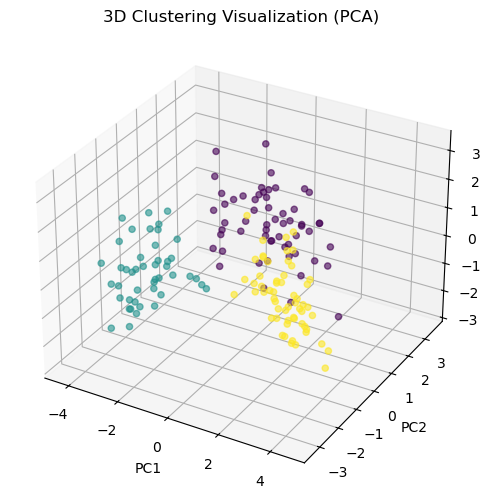

In [287]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca[0], df_pca[1], df_pca[2], c=pca_df['Cluster'], cmap='viridis', alpha=0.6)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("3D Clustering Visualization (PCA)")
plt.show()

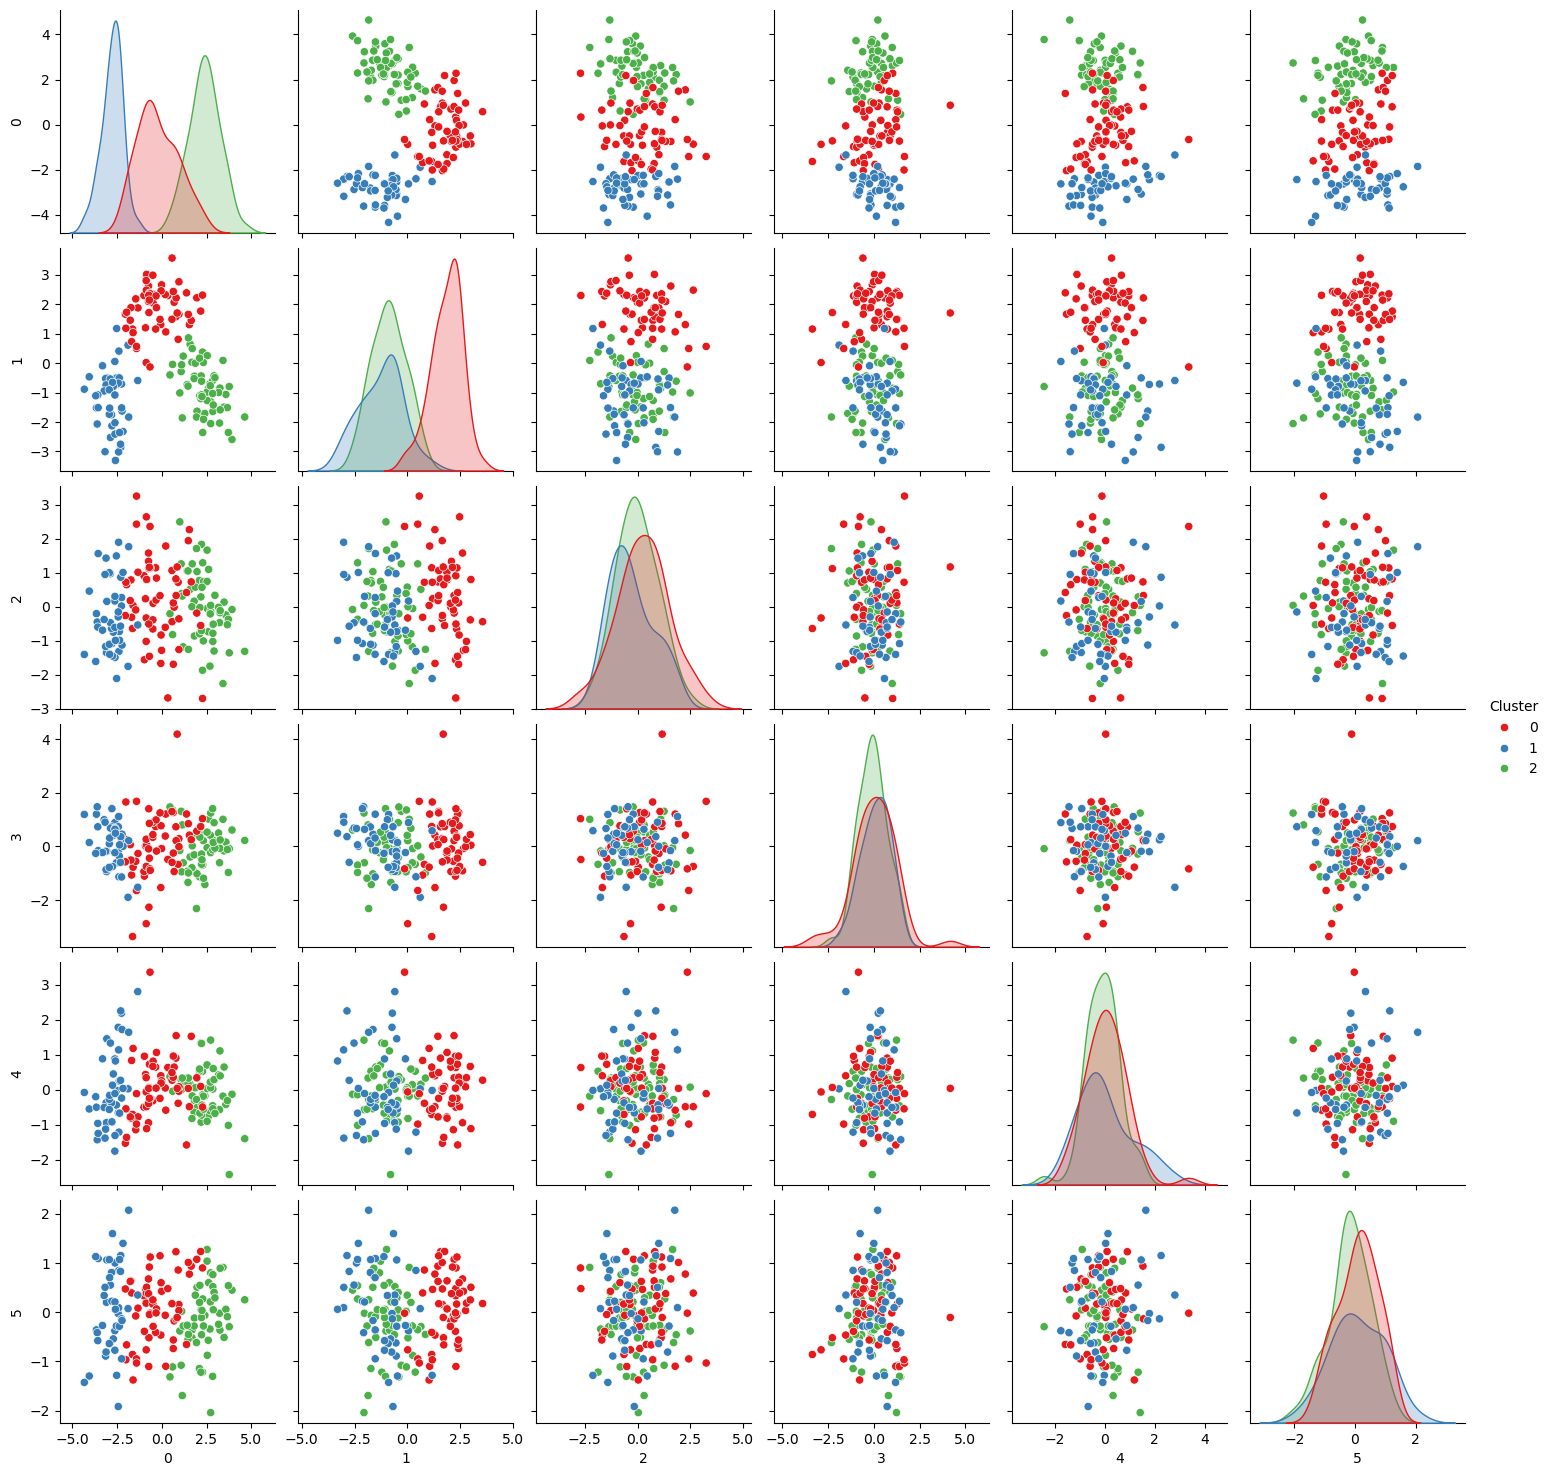

In [289]:
sns.pairplot(df_pca, hue='Cluster', palette='Set1', diag_kind='kde')
plt.show()

 ## Task 5

Clustering Performance:

Clustering on the original dataset retains all feature information, which may help in better separation.

Clustering on PCA-transformed data may improve results if redundant features are removed but could also reduce performance if important features are lost.

Silhouette Score Comparison:

If the silhouette score for PCA-based clustering is higher, PCA helped in making clusters more distinct.

If the score dropped, PCA might have removed useful information, making clusters less meaningful.

 Computational Efficiency:

PCA reduces dimensions, making clustering faster and more efficient.

Clustering on the original dataset is slower due to high-dimensional data but may give better results.

 Trade-Off:

PCA is useful for high-dimensional datasets but should be used carefully to avoid losing important variance.

Best results depend on the dataset—testing both approaches is recommended.


## Task 6

 ## Conclusion & Insights

## When to Use PCA Before Clustering:

If the dataset has too many features and some are redundant.

When computational power is limited, and a faster clustering process is needed.

When visualizing clusters in 2D or 3D is required.

## When Not to Use PCA:

If PCA reduces clustering performance (lower silhouette score).

When original features hold important domain-specific meaning that PCA might remove.